In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
#import extractor
%matplotlib inline
import random
import gc
from sklearn.tree import DecisionTreeClassifier

In [2]:
def getTokens(input):
    tokensBySlash = str(input.encode('utf-8')).split('/')
    allTokens=[]
    for i in tokensBySlash:
        tokens = str(i).split('-')
        tokensByDot = []
        for j in range(0,len(tokens)):
            tempTokens = str(tokens[j]).split('.')
            tokentsByDot = tokensByDot + tempTokens
        allTokens = allTokens + tokens + tokensByDot
    allTokens = list(set(allTokens))
    if 'com' in allTokens:
        allTokens.remove('com')
    return allTokens

In [3]:
df=pd.read_csv("/Users/abhinavshinow/Documents/GitHub/Mal_URL/Data/mal_1.csv")

In [4]:
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [5]:
df['type']=df['type'].replace({'phishing':1,'benign':0,'defacement':1,'malware':1})

In [6]:
df.drop_duplicates(keep='first',inplace=True)

In [16]:
df2=pd.read_csv("/Users/abhinavshinow/Documents/GitHub/Mal_URL/Data/mal_2.csv")

In [17]:
df2.head()

,Unnamed: 0,url,label,result
0,0,https://www.google.com,benign,0
1,1,https://www.youtube.com,benign,0
2,2,https://www.facebook.com,benign,0
3,3,https://www.baidu.com,benign,0
4,4,https://www.wikipedia.org,benign,0


In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450176 entries, 0 to 450175
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  450176 non-null  int64 
 1   url         450176 non-null  object
 2   label       450176 non-null  object
 3   result      450176 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 13.7+ MB


In [19]:
df2.describe()

,Unnamed: 0,result
count,450176.000000,450176.000000
mean,225087.500000,0.231994
std,129954.761728,0.422105
min,0.000000,0.000000
25%,112543.750000,0.000000
50%,225087.500000,0.000000
75%,337631.250000,0.000000
max,450175.000000,1.000000


In [34]:
df2.drop(df2.columns[df2.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df2.drop('label',axis = 1, inplace = True)

In [35]:
df2.head()

,url,result
0,https://www.google.com,0
1,https://www.youtube.com,0
2,https://www.facebook.com,0
3,https://www.baidu.com,0
4,https://www.wikipedia.org,0


In [36]:
df2=df2.rename(columns={'result': 'type'})

In [37]:
df2.head()

,url,type
0,https://www.google.com,0
1,https://www.youtube.com,0
2,https://www.facebook.com,0
3,https://www.baidu.com,0
4,https://www.wikipedia.org,0


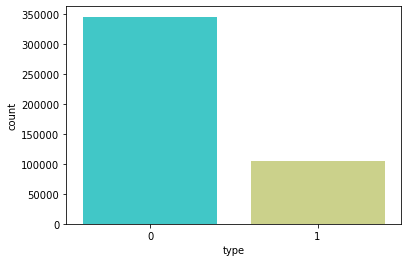

In [38]:
sns.countplot(x='type',data=df2, palette='rainbow')
plt.show()

In [7]:
data=np.array(df)

In [8]:
random.shuffle(data)

In [9]:
y=[d[1] for d in data]
url=[d[0] for d in data]
vectorised_url=TfidfVectorizer(tokenizer=getTokens)
x=vectorised_url.fit_transform(url)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,shuffle='True')
gc.collect

<function gc.collect(generation=2)>

In [11]:
model=LogisticRegression(solver='lbfgs', max_iter=10000)
model.fit(x_train,y_train)
# model=RandomForestClassifier(n_jobs=8)
# model.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [12]:
model.score(x_test,y_test)

0.9652329888867226

In [13]:
pred=model.predict(x_test)


In [14]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[94185   175]
 [ 4283 29582]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     94360
           1       0.99      0.87      0.93     33865

    accuracy                           0.97    128225
   macro avg       0.98      0.94      0.95    128225
weighted avg       0.97      0.97      0.96    128225



In [15]:
gc.collect

<function gc.collect(generation=2)>